In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [4]:
CAPTIONS_FILE = r'F:\my_captioning\data\captions.txt'

In [5]:
df = pd.read_csv(CAPTIONS_FILE, sep=',', header=None, names=['image', 'caption'])

In [6]:
print(f"Total rows (captions): {len(df)}")
print(f"Unique images: {df['image'].nunique()}")

Total rows (captions): 158916
Unique images: 31784


In [7]:
captions_per_image = df.groupby('image').size()
print(f"Average captions per image: {captions_per_image.mean():.2f}")
print(f"Most common captions per image (value counts):\n{captions_per_image.value_counts().head()}")


Average captions per image: 5.00
Most common captions per image (value counts):
5    31783
1        1
Name: count, dtype: int64


In [13]:
#captions per image
captions_per_image = df.groupby('image').size()
print(f"Average captions per image: {captions_per_image.mean():.0f}")

Average captions per image: 5


In [16]:
# Caption length analysis

df['caption_word_count'] = df['caption'].str.split().apply(len)
print(f"Average caption words: {df['caption_word_count'].mean():.0f}")
print(f"Max caption words: {df['caption_word_count'].max()}")

Average caption words: 13
Max caption words: 82


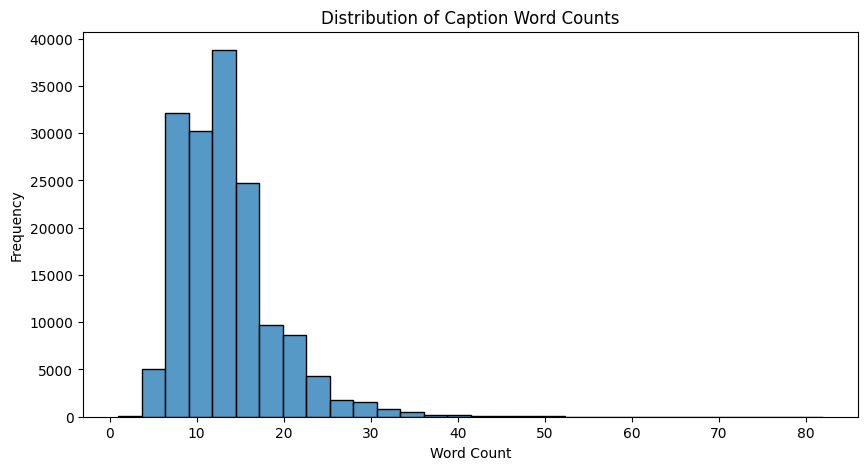

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['caption_word_count'], bins=30)
plt.title('Distribution of Caption Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

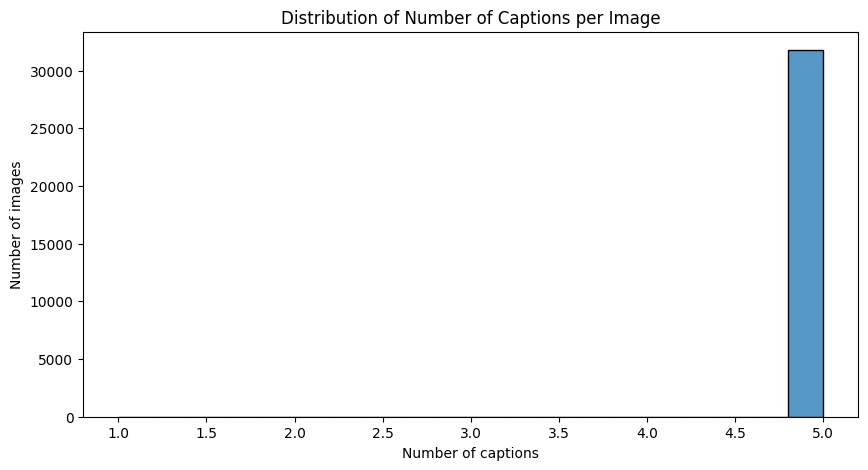

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(captions_per_image, bins=20)
plt.title('Distribution of Number of Captions per Image')
plt.xlabel('Number of captions')
plt.ylabel('Number of images')
plt.show()

In [21]:
# Most frequent words analysis (excluding stopwords)

text = ' '.join(df['caption'].dropna())
stopwords = set(["the", "a", "and", "in", "of", "on", "with", "to", "is", "are", "for", "that", "this", "an", "by", "as", "at", "from", "it", "were"])
words = re.findall(r'\b\w+\b', text.lower())
filtered_words = [w for w in words if w not in stopwords and len(w) > 2]
common_words = Counter(filtered_words).most_common(50)
print("Top 50 non-stopwords:", common_words)

Top 50 non-stopwords: [('man', 42626), ('woman', 22213), ('two', 21680), ('people', 17338), ('wearing', 15714), ('shirt', 14342), ('white', 13290), ('young', 13219), ('black', 12391), ('while', 11711), ('his', 11495), ('blue', 11390), ('red', 10278), ('girl', 9656), ('sitting', 9620), ('men', 9499), ('boy', 9430), ('standing', 9114), ('dog', 9093), ('playing', 8622), ('street', 8012), ('group', 7853), ('down', 7767), ('front', 7610), ('her', 7414), ('walking', 7339), ('holding', 6987), ('one', 6517), ('water', 5975), ('three', 5796), ('women', 5276), ('green', 5273), ('looking', 5120), ('child', 5080), ('little', 4796), ('large', 4759), ('outside', 4702), ('brown', 4606), ('yellow', 4587), ('person', 4486), ('children', 4455), ('through', 4301), ('hat', 4048), ('their', 4037), ('other', 3986), ('ball', 3914), ('small', 3781), ('next', 3752), ('into', 3731), ('over', 3703)]


C:\Users\sirja\AppData\Local\Temp\ipykernel_20084\2629025909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words], palette='mako')


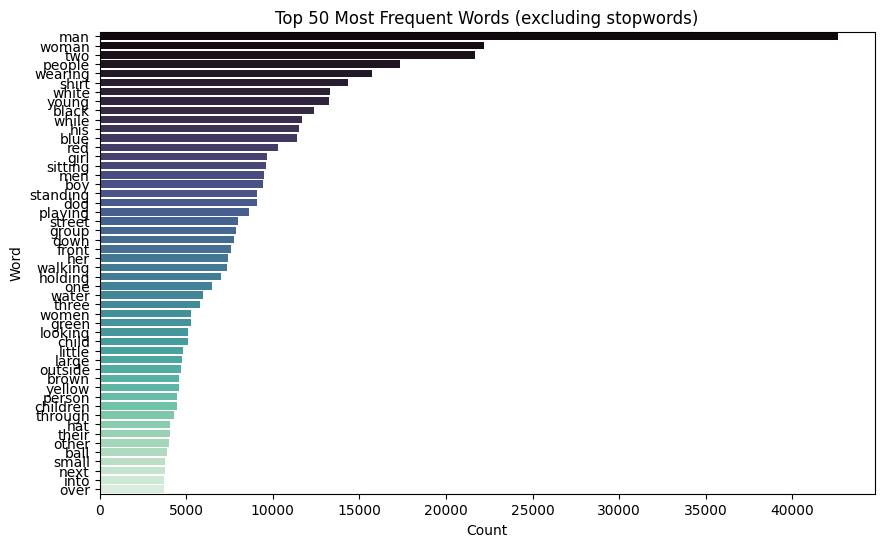

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words], palette='mako')
plt.title('Top 50 Most Frequent Words (excluding stopwords)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()